# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Nibroos Abrar
- **Email:** mnibroosabrar@gmail.com
- **ID Dicoding:** nibroos_a

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara di setiap stasiun dari waktu ke waktu
- Apa faktor utama yang memengaruhi kualitas udara di masing-masing stasiun?
- Bagaimana perbandingan kualitas udara antarstasiun?


## Import Semua Packages/Library yang Digunakan

In [113]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob


## Data Wrangling

### Gathering Data

In [114]:
aotizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [115]:
changping_df = pd.read_csv("https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Changping_20130301-20170228.csv")
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [116]:
dingling_df = pd.read_csv("https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Dingling_20130301-20170228.csv")
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [117]:
dongsi_df = pd.read_csv("https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [118]:
guanyuan_df = pd.read_csv("https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [119]:
gucheng_df = pd.read_csv("https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Gucheng_20130301-20170228.csv")
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [120]:
huairou_df = pd.read_csv("https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Huairou_20130301-20170228.csv")
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [121]:
nongzhanguan_df = pd.read_csv("https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [122]:
shunyi_df = pd.read_csv("https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Shunyi_20130301-20170228.csv")
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [123]:
tiantan_df = pd.read_csv("https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Tiantan_20130301-20170228.csv")
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [124]:
wanliu_df = pd.read_csv("https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Wanliu_20130301-20170228.csv")
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [125]:
wanshouxigong_df = pd.read_csv("https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
Seluruh data berhasil dimuat, terdapat 18 kolom yang tersedia, yaitu
- No
- Year
- Month
- Day
- Hour
- PM2.5
- PM10
- SO2
- NO2
- CO
- O3
- TEMP
- PRES
- DEWP
- RAIN
- wd
- WSPM
- Station

### Assessing Data

#### Menilai Tabel `aotizhongxin_df`

In [126]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [127]:
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [128]:
aotizhongxin_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        545
PM10         633
SO2          330
NO2          465
CO           112
O3           831
TEMP         967
PRES         600
DEWP         604
RAIN         127
wd            16
WSPM          91
station        1
dtype: int64

In [129]:
print("Jumlah duplikasi: ", aotizhongxin_df.duplicated().sum())

Jumlah duplikasi:  0


In [130]:
aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


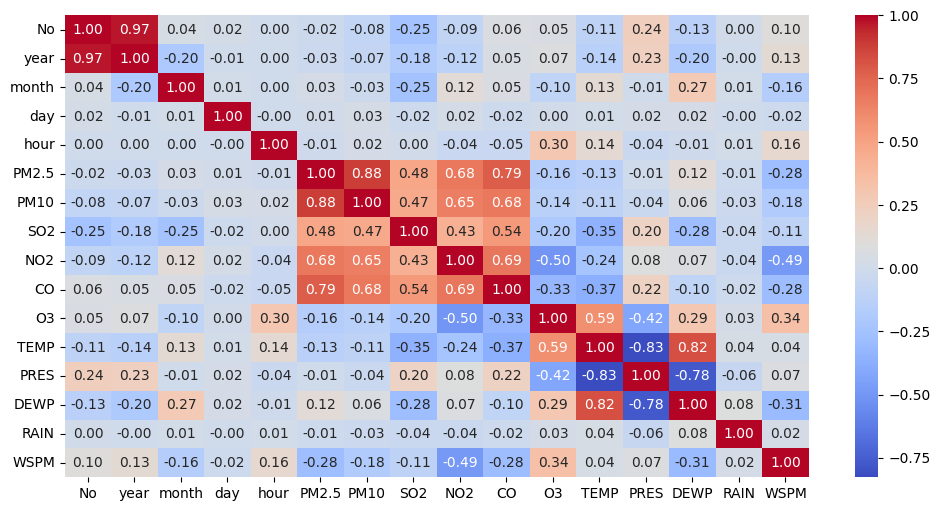

In [131]:
# Memilih hanya kolom numerik
numeric_df = aotizhongxin_df.select_dtypes(include=[np.number])

# Cek korelasi
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


#### Menilai Tabel `changping_df`

In [132]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [133]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [134]:
changping_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        481
PM10         562
SO2          294
NO2          459
CO           115
O3           886
TEMP         998
PRES         592
DEWP         602
RAIN         116
wd            16
WSPM          95
station        1
dtype: int64

In [135]:
print("Jumlah duplikasi: ", changping_df.duplicated().sum())

Jumlah duplikasi:  0


In [136]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Menilai Tabel `dingling_df`

In [137]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [138]:
dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [139]:
dingling_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        486
PM10         554
SO2          327
NO2          636
CO           103
O3           792
TEMP         998
PRES         593
DEWP         602
RAIN         116
wd            16
WSPM          95
station        1
dtype: int64

In [140]:
print("Jumlah duplikasi: ", dingling_df.duplicated().sum())

Jumlah duplikasi:  0


In [141]:
dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Menilai Tabel `dongsi_df`

In [142]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [143]:
dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [144]:
dongsi_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        582
PM10         666
SO2          392
NO2          701
CO           115
O3           737
TEMP         963
PRES         595
DEWP         617
RAIN         119
wd            16
WSPM         101
station        1
dtype: int64

In [145]:
print("Jumlah duplikasi: ", dongsi_df.duplicated().sum())

Jumlah duplikasi:  0


In [146]:
dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Menilai Tabel `guanyuan_df`

In [147]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [148]:
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [149]:
guanyuan_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        557
PM10         630
SO2          280
NO2          376
CO           117
O3           767
TEMP         967
PRES         600
DEWP         604
RAIN         127
wd            16
WSPM          91
station        1
dtype: int64

In [150]:
print("Jumlah duplikasi: ", guanyuan_df.duplicated().sum())

Jumlah duplikasi:  0


In [151]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


#### Menilai Tabel `gucheng_df`

In [152]:
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [153]:
gucheng_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [154]:
gucheng_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        577
PM10         660
SO2          243
NO2          367
CO           116
O3           804
TEMP         995
PRES         592
DEWP         594
RAIN         125
wd            16
WSPM         101
station        1
dtype: int64

In [155]:
print("Jumlah duplikasi: ", gucheng_df.duplicated().sum())

Jumlah duplikasi:  0


In [156]:
gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


#### Menilai Tabel `huairou_df`

In [157]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [158]:
huairou_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [159]:
huairou_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        479
PM10         556
SO2          247
NO2          296
CO           108
O3           812
TEMP        1012
PRES         589
DEWP         617
RAIN         128
wd            16
WSPM         105
station        1
dtype: int64

In [160]:
print("Jumlah duplikasi: ", huairou_df.duplicated().sum())

Jumlah duplikasi:  0


In [161]:
huairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


#### Menilai Tabel `nongzhanguan_df`

In [162]:
nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [163]:
nongzhanguan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [164]:
nongzhanguan_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        565
PM10         649
SO2          263
NO2          595
CO           115
O3           732
TEMP         963
PRES         595
DEWP         617
RAIN         119
wd            16
WSPM         101
station        1
dtype: int64

In [165]:
print("Jumlah duplikasi: ", nongzhanguan_df.duplicated().sum())

Jumlah duplikasi:  0


In [166]:
nongzhanguan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Menilai Tabel `shunyi_df`

In [167]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [168]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [169]:
shunyi_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        567
PM10         605
SO2          267
NO2          517
CO           115
O3           961
TEMP         985
PRES         602
DEWP         608
RAIN         120
wd            16
WSPM         103
station        1
dtype: int64

In [170]:
print("Jumlah duplikasi: ", shunyi_df.duplicated().sum())

Jumlah duplikasi:  0


In [171]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


#### Menilai Tabel `tiantan_df`

In [172]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [173]:
tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [174]:
tiantan_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        545
PM10         640
SO2          259
NO2          319
CO           117
O3           678
TEMP         963
PRES         595
DEWP         617
RAIN         119
wd            16
WSPM         101
station        1
dtype: int64

In [175]:
print("Jumlah duplikasi: ", tiantan_df.duplicated().sum())

Jumlah duplikasi:  0


In [176]:
tiantan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Menilai Tabel `wanliu_df`

In [177]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [178]:
wanliu_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [179]:
wanliu_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        539
PM10         616
SO2          460
NO2          958
CO           120
O3           734
TEMP         971
PRES         593
DEWP         600
RAIN         125
wd            16
WSPM          86
station        1
dtype: int64

In [180]:
print("Jumlah duplikasi: ", wanliu_df.duplicated().sum())

Jumlah duplikasi:  0


In [181]:
wanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


#### Menilai Tabel `wanshouxigong_df`

In [182]:
wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [183]:
wanshouxigong_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [184]:
wanshouxigong_df.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        585
PM10         648
SO2          279
NO2          422
CO           116
O3           716
TEMP         965
PRES         607
DEWP         608
RAIN         121
wd            16
WSPM          96
station        1
dtype: int64

In [185]:
print("Jumlah duplikasi: ", wanshouxigong_df.duplicated().sum())

Jumlah duplikasi:  0


In [186]:
wanshouxigong_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


**Insight:**
Seluruh tabel aman dari duplikasi, tetapi banyak beberapa baris di seluruh tabel yang memiliki nilai NaN

### Cleaning Data

In [187]:
# List semua raw URL file CSV di GitHub
csv_urls = [
    "https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Changping_20130301-20170228.csv",
    "https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Dingling_20130301-20170228.csv",
    "https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Dongsi_20130301-20170228.csv",
    "https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Gucheng_20130301-20170228.csv",
    "https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Huairou_20130301-20170228.csv",
    "https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Shunyi_20130301-20170228.csv",
    "https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Tiantan_20130301-20170228.csv",
    "https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Wanliu_20130301-20170228.csv",
    "https://raw.githubusercontent.com/NibroosAbrar/airqualitydashboard/main/Data/PRSA_Data_Wanshouxigong_20130301-20170228.csv",
]

# List untuk menyimpan setiap DataFrame
df_list = []

# Loop untuk membaca semua file CSV
for url in csv_urls:
    df = pd.read_csv(url)
    df_list.append(df)

# Gabungkan semua DataFrame
merged_df = pd.concat(df_list, ignore_index=True)

# Simpan ke file CSV jika ingin
merged_df.to_csv("merged_air_quality.csv", index=False)

merged_df = pd.read_csv("merged_air_quality.csv")
merged_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


#### Membersihkan Tabel `merged_df`

##### duplicate

In [188]:
print("Jumlah duplikasi: ", merged_df.duplicated().sum())

Jumlah duplikasi:  0


##### missing value

In [189]:
merged_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [190]:
merged_df[merged_df.isna().any(axis=1)]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
74,75,2013,3,4,2,34.0,62.0,NaN,14.0000,300.0,68.0,8.1,1016.7,-11.8,0.0,N,4.3,Aotizhongxin
75,76,2013,3,4,3,12.0,34.0,6.0000,12.0000,NaN,77.0,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
76,77,2013,3,4,4,7.0,18.0,14.0000,NaN,400.0,42.0,6.0,1018.0,-11.6,0.0,NNW,1.0,Aotizhongxin
124,125,2013,3,6,4,192.0,203.0,83.6808,140.4252,NaN,22.0,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
170,171,2013,3,8,2,339.0,400.0,NaN,162.0000,3899.0,84.0,2.5,998.2,-1.9,0.0,SW,0.8,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420732,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong
420733,35030,2017,2,27,13,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1015.8,-5.2,0.0,SSE,1.8,Wanshouxigong
420758,35055,2017,2,28,14,3.0,6.0,NaN,5.0000,NaN,82.0,14.6,1013.3,-15.6,0.0,N,3.6,Wanshouxigong
420759,35056,2017,2,28,15,11.0,21.0,2.0000,5.0000,200.0,NaN,15.4,1013.0,-15.0,0.0,NNW,3.3,Wanshouxigong


In [191]:
missing_percent = (merged_df.isna().mean() * 100).sort_values(ascending=False)
print(missing_percent)

CO         4.919813
O3         3.155421
NO2        2.879497
SO2        2.143937
PM2.5      2.076916
PM10       1.532674
wd         0.433018
DEWP       0.095777
TEMP       0.094589
PRES       0.093401
RAIN       0.092688
WSPM       0.075576
year       0.000000
No         0.000000
day        0.000000
month      0.000000
hour       0.000000
station    0.000000
dtype: float64


In [192]:
# merged_df.dropna(inplace=True)

##### Imputasi data dengan median

In [193]:
pollutant_cols = ["PM2.5", "PM10", "SO2", "NO2", "O3", "CO"]
merged_df[pollutant_cols] = merged_df[pollutant_cols].fillna(merged_df[pollutant_cols].median())

##### Interpolasi data

In [194]:
merged_df[["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]] = merged_df[["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]].interpolate()

##### Imputasi data dengan mode

In [195]:
merged_df["wd"] = merged_df["wd"].fillna(merged_df["wd"].mode()[0])

In [196]:
merged_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [197]:
# Mengubah kolom 'No' agar berurut dari 1 hingga jumlah total baris
merged_df["No"] = range(1, len(merged_df) + 1)

# Cek hasilnya
print(merged_df[["station", "No"]].head())


        station  No
0  Aotizhongxin   1
1  Aotizhongxin   2
2  Aotizhongxin   3
3  Aotizhongxin   4
4  Aotizhongxin   5


In [198]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [199]:
merged_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,210384.500000,2014.662560,6.522930,15.729637,11.500000,79.278489,104.256193,15.641507,50.418633,1214.493362,56.981874,13.531692,1010.753337,2.482421,0.064428,1.730034
std,121465.403371,1.177198,3.448707,8.800102,6.922195,80.056799,91.108745,21.455419,34.642023,1133.542988,55.802413,11.437867,10.474302,13.797675,0.820638,1.246674
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,105192.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,210384.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,315576.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,420768.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


##### Simpan data

In [ ]:
folder_name = "dashboard"
os.makedirs(folder_name, exist_ok=True)  # Membuat folder jika belum ada

file_path = os.path.join(folder_name, "cleaned_data.csv")
merged_df.to_csv(file_path, index=False)

**Insight:**
Seluruh tabel digabung menjadi satu. Lalu dilakukan pembersihan tabel dengan mengatasi missing value. Missing value di atasi dengan metode imputasi data berdasarkan nilai median pada kolom PM2.5, PM10, SO2, NO2, O3, dan CO. Lalu metode interpolasi pada kolom TEMP, PRES, DEWP, RAIN, dan WSPM. Serta imputasi berdasarkan nilai mode (modus) pada kolom wd

## Exploratory Data Analysis (EDA)

In [201]:
merged_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,210384.500000,2014.662560,6.522930,15.729637,11.500000,79.278489,104.256193,15.641507,50.418633,1214.493362,56.981874,13.531692,1010.753337,2.482421,0.064428,NaN,1.730034,NaN
std,121465.403371,1.177198,3.448707,8.800102,6.922195,80.056799,91.108745,21.455419,34.642023,1133.542988,55.802413,11.437867,10.474302,13.797675,0.820638,NaN,1.246674,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,105192.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,210384.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,315576.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [202]:
merged_df.No.is_unique

True

In [203]:
merged_df.No.duplicated

<bound method Series.duplicated of 0              1
1              2
2              3
3              4
4              5
           ...  
420763    420764
420764    420765
420765    420766
420766    420767
420767    420768
Name: No, Length: 420768, dtype: int64>

In [204]:
merged_df.groupby(by="station").No.nunique().sort_values(ascending=False)

station
Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: No, dtype: int64

In [205]:
merged_df.groupby(by="station").agg({
    "No": "nunique",
    "PM2.5": ["max", "min", "mean", "std", ]
})

No  PM2.5                           
              nunique    max  min       mean        std
station                                                
Aotizhongxin    35064  898.0  3.0  82.040934  81.167179
Changping       35064  882.0  2.0  70.744359  71.563284
Dingling        35064  881.0  3.0  65.745349  71.478777
Dongsi          35064  737.0  3.0  85.527068  85.763033
Guanyuan        35064  680.0  2.0  82.442642  80.303309
Gucheng         35064  770.0  2.0  83.320534  82.121889
Huairou         35064  762.0  2.0  69.228839  70.290563
Nongzhanguan    35064  844.0  2.0  84.304073  85.541269
Shunyi          35064  941.0  2.0  78.853887  80.261997
Tiantan         35064  821.0  3.0  81.640423  80.223492
Wanliu          35064  957.0  2.0  83.065591  81.511416
Wanshouxigong   35064  999.0  3.0  84.428174  85.221355

In [206]:
merged_df.groupby(by="station").agg({
    "No": "nunique",
    "PM10": ["max", "min", "mean", "std", ]
})

No   PM10                            
              nunique    max  min        mean        std
station                                                 
Aotizhongxin    35064  984.0  2.0  109.485803  94.326755
Changping       35064  999.0  2.0   94.447773  82.762130
Dingling        35064  905.0  2.0   83.707175  78.794444
Dongsi          35064  955.0  2.0  109.889839  97.506176
Guanyuan        35064  999.0  2.0  108.692679  91.060249
Gucheng         35064  994.0  2.0  118.461442  96.291445
Huairou         35064  993.0  2.0   91.272559  82.373383
Nongzhanguan    35064  995.0  2.0  108.652398  94.788708
Shunyi          35064  999.0  2.0   98.475451  88.468722
Tiantan         35064  988.0  2.0  105.948856  88.989076
Wanliu          35064  951.0  2.0  110.234069  92.453705
Wanshouxigong   35064  961.0  2.0  111.806274  96.981426

**Insight:**
Dilakukan eksplorasi, tabel gabungan sudah memiliki No dengan nilai unik. Terdapat 35064 baris data untuk setiap stasiun. Dilakukan pengecekan nilai max, min, mean, dan std untuk PM2.5 dan PM10 pada setiap stasiun

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren kualitas udara di setiap stasiun dari waktu ke waktu

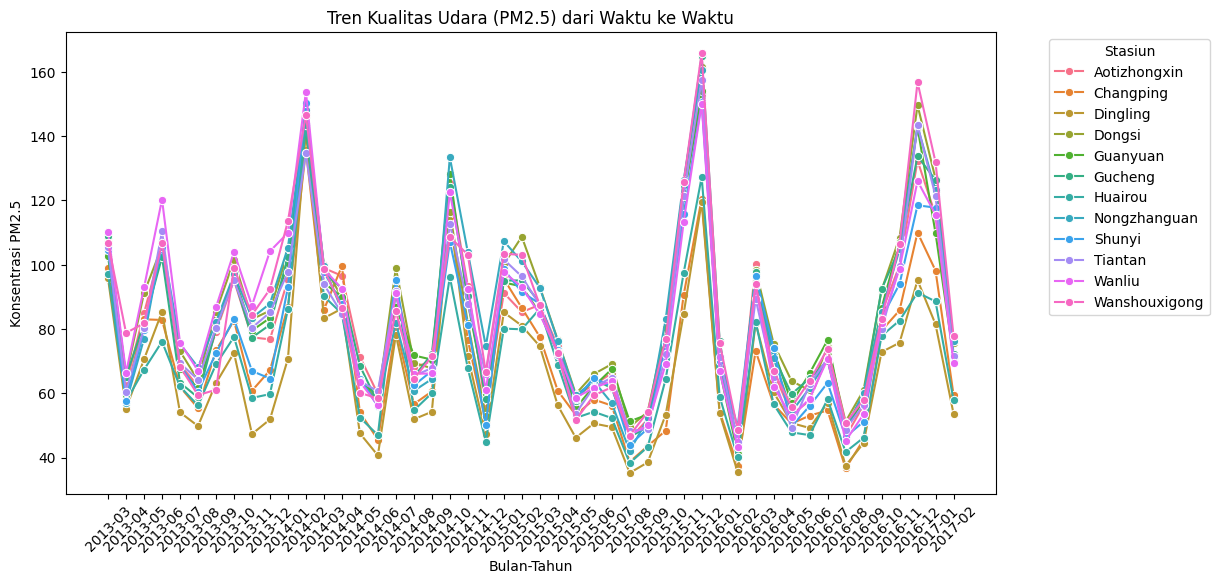

In [207]:
# Buat kolom Month-Year untuk sumbu X
merged_df["month_year"] = pd.to_datetime(merged_df[["year", "month"]].assign(day=1)).dt.strftime("%Y-%m")

# Grupkan data berdasarkan month_year dan station, lalu hitung rata-rata PM2.5
df_grouped = merged_df.groupby(["month_year", "station"], as_index=False)["PM2.5"].mean()

# Plot tren PM2.5 per stasiun
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x="month_year", y="PM2.5", hue="station", marker="o")

plt.title("Tren Kualitas Udara (PM2.5) dari Waktu ke Waktu")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Konsentrasi PM2.5")
plt.xticks(rotation=45)

# Memindahkan legend ke luar plot agar tidak menghalangi grafik
plt.legend(title="Stasiun", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()



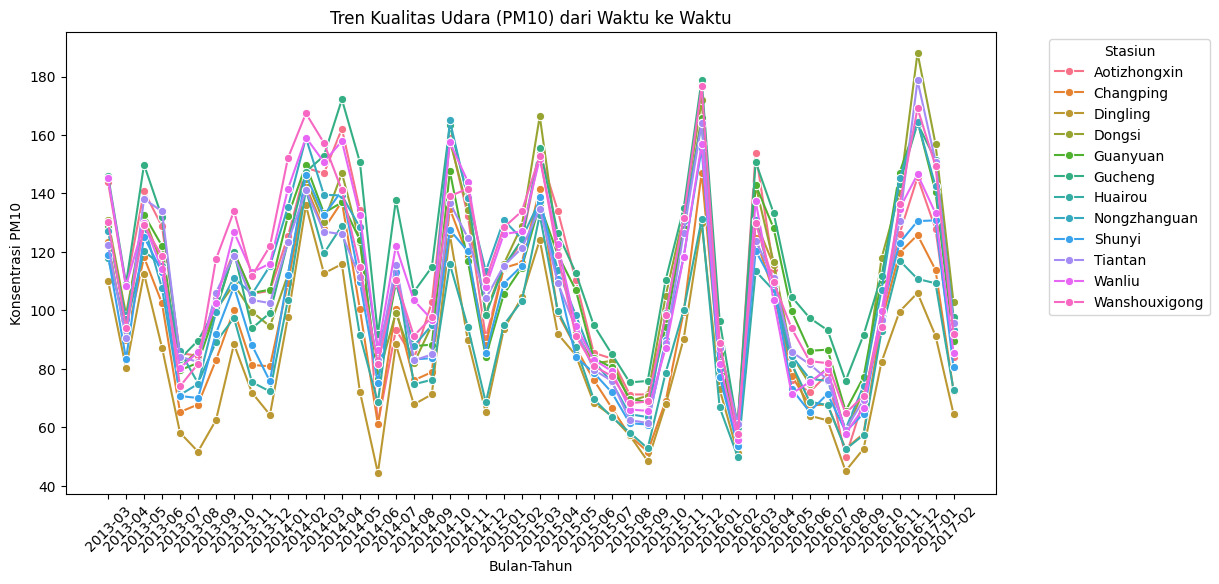

In [208]:
# Buat kolom Month-Year untuk sumbu X
merged_df["month_year"] = pd.to_datetime(merged_df[["year", "month"]].assign(day=1)).dt.strftime("%Y-%m")

# Grupkan data berdasarkan month_year dan station, lalu hitung rata-rata PM2.5
df_grouped = merged_df.groupby(["month_year", "station"], as_index=False)["PM10"].mean()

# Plot tren PM10 per stasiun
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x="month_year", y="PM10", hue="station", marker="o")

plt.title("Tren Kualitas Udara (PM10) dari Waktu ke Waktu")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Konsentrasi PM10")
plt.xticks(rotation=45)

# Memindahkan legend ke luar plot agar tidak menghalangi grafik
plt.legend(title="Stasiun", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


### Pertanyaan 2: Apa faktor utama yang memengaruhi kualitas udara di masing-masing stasiun?

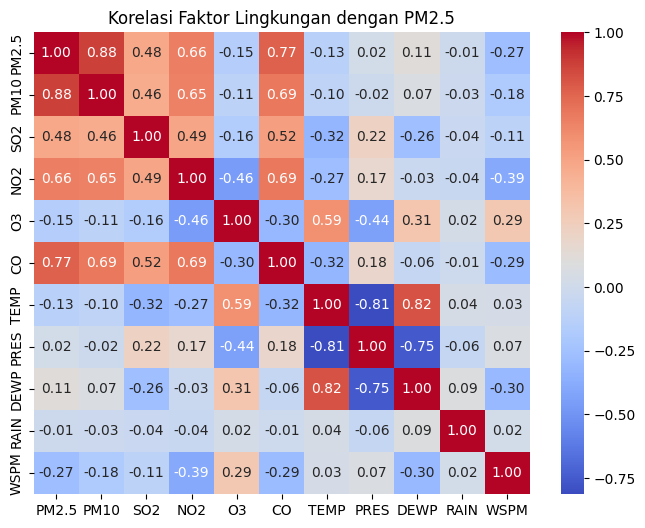

In [216]:
# Hitung korelasi antara variabel
correlation_matrix = merged_df[["PM2.5","PM10","SO2","NO2","O3","CO","TEMP","PRES","DEWP","RAIN", "WSPM"]].corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Faktor Lingkungan dengan PM2.5")
plt.show()


### Pertanyaan 3: Bagaimana perbandingan kualitas udara antarstasiun?

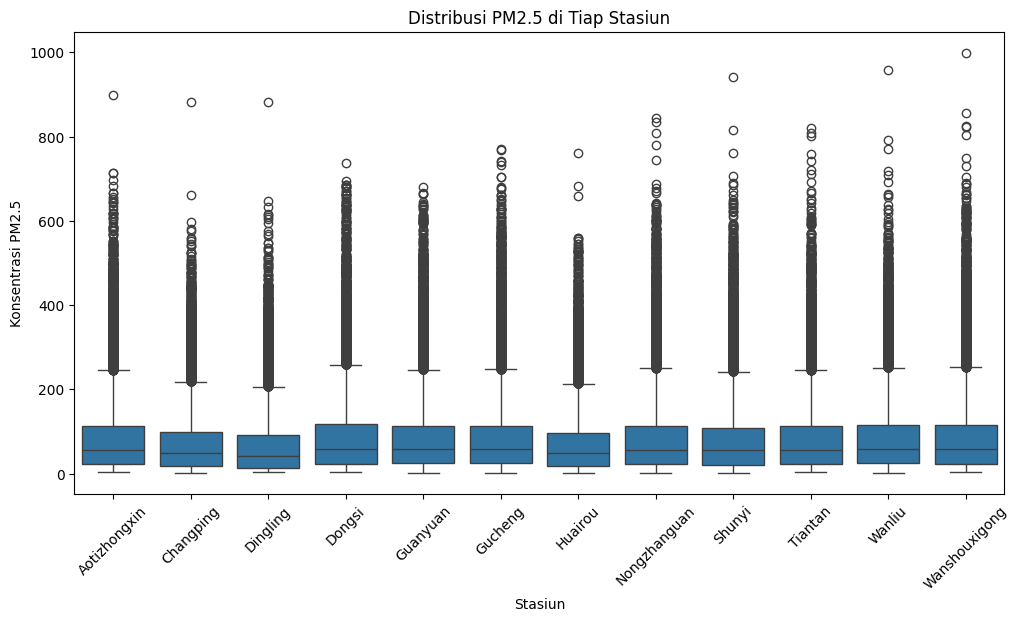

In [210]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x="station", y="PM2.5")
plt.title("Distribusi PM2.5 di Tiap Stasiun")
plt.xlabel("Stasiun")
plt.ylabel("Konsentrasi PM2.5")
plt.xticks(rotation=45)
plt.show()

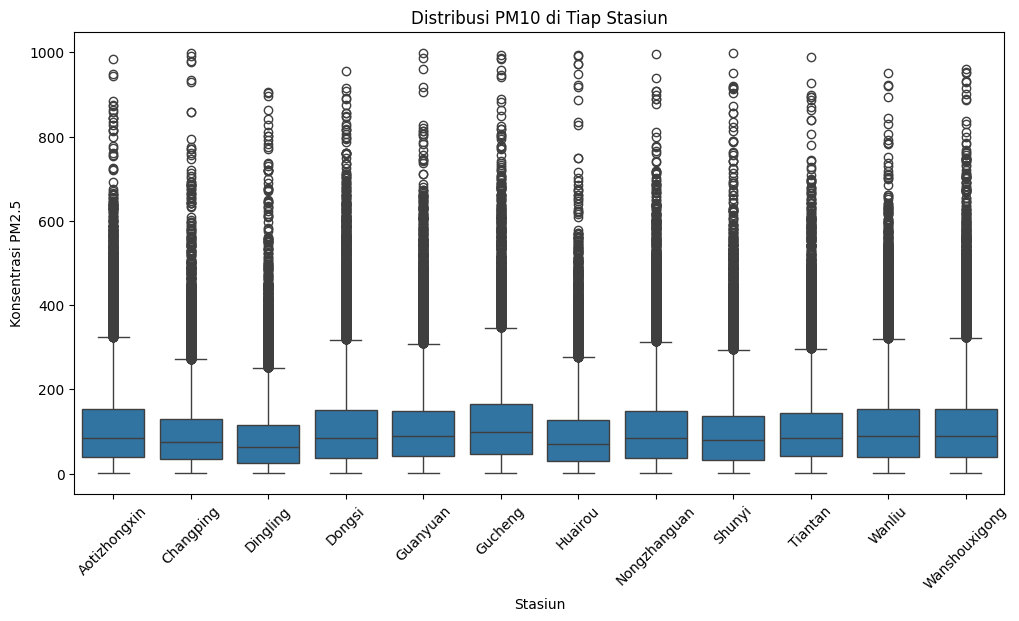

In [211]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x="station", y="PM10")
plt.title("Distribusi PM10 di Tiap Stasiun")
plt.xlabel("Stasiun")
plt.ylabel("Konsentrasi PM2.5")
plt.xticks(rotation=45)
plt.show()

## Analisis Lanjutan

Processing Aotizhongxin...


d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


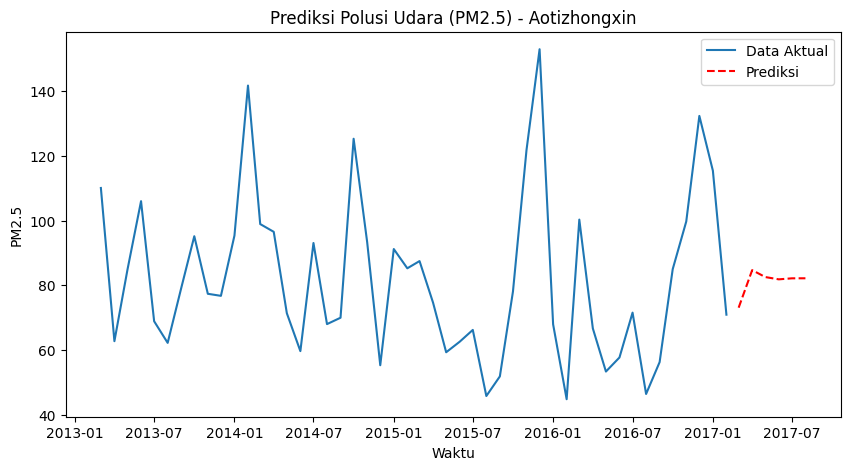

Processing Changping...


d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


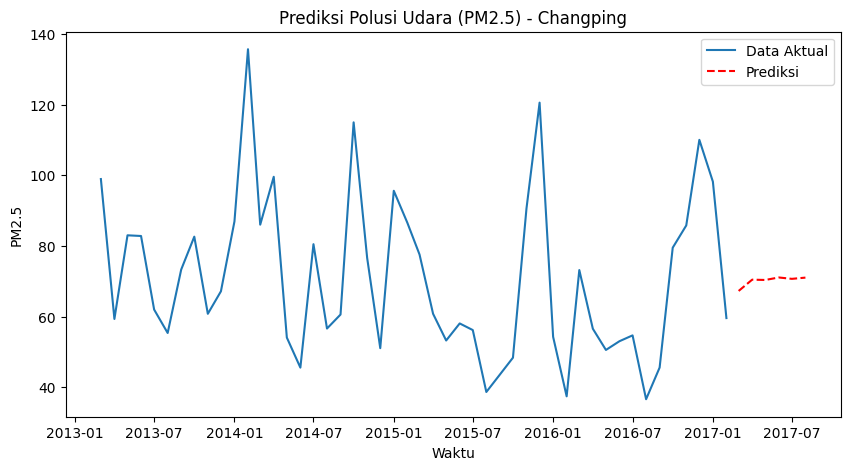

Processing Dingling...


d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


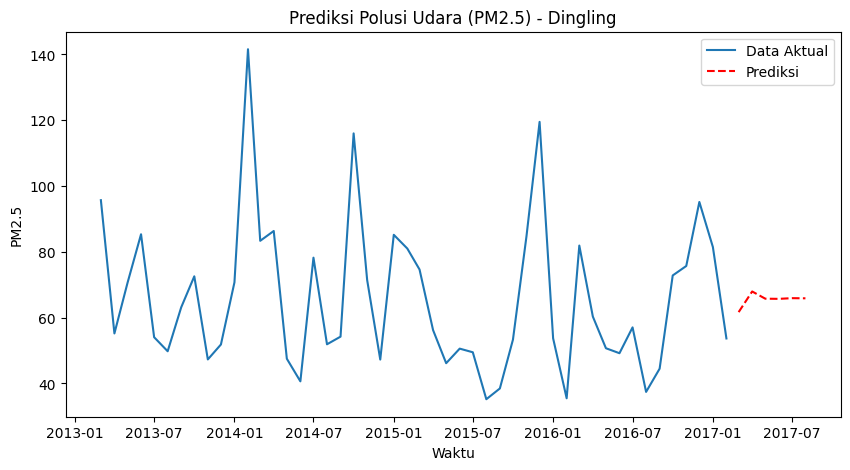

Processing Dongsi...


d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


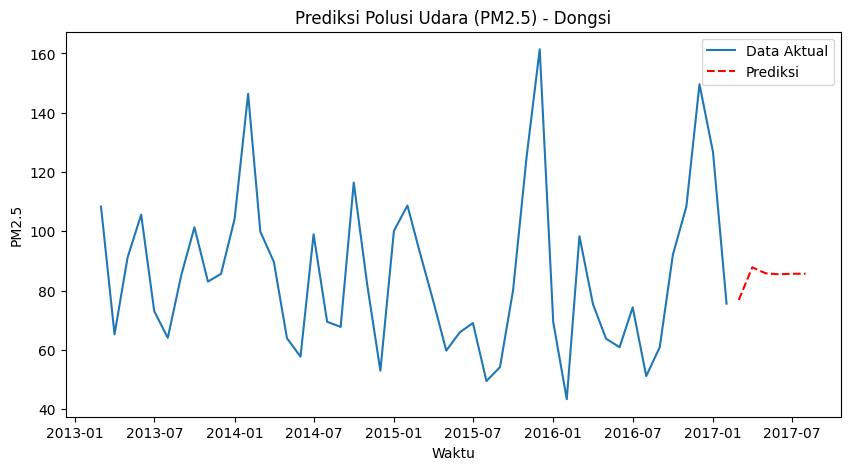

Processing Guanyuan...


d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


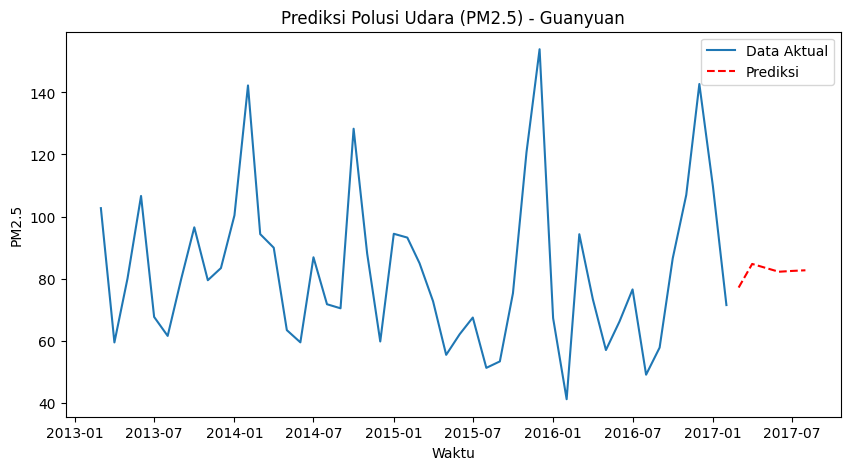

Processing Gucheng...


d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


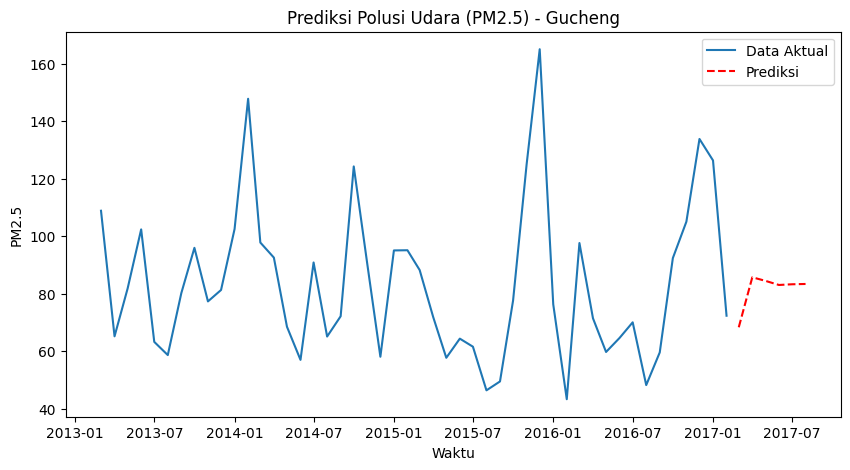

Processing Huairou...


d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


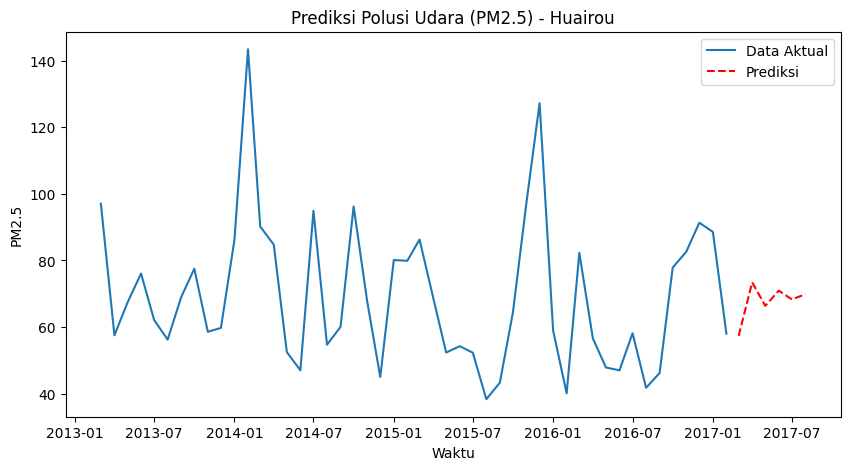

Processing Nongzhanguan...


d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


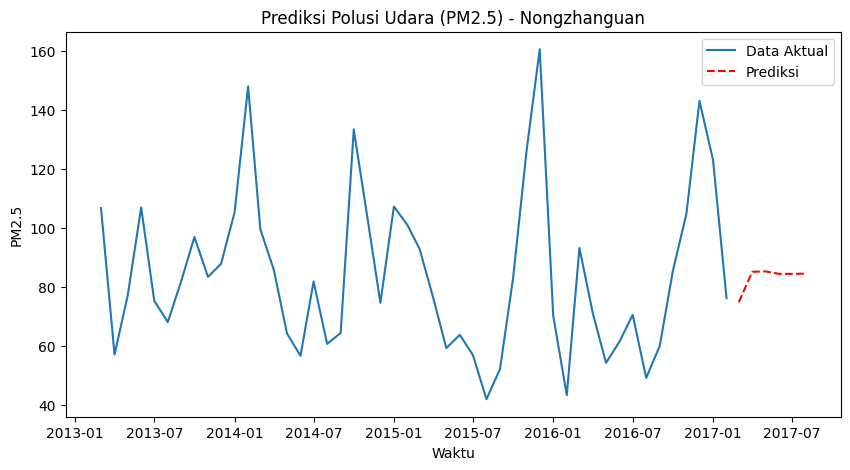

Processing Shunyi...


d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


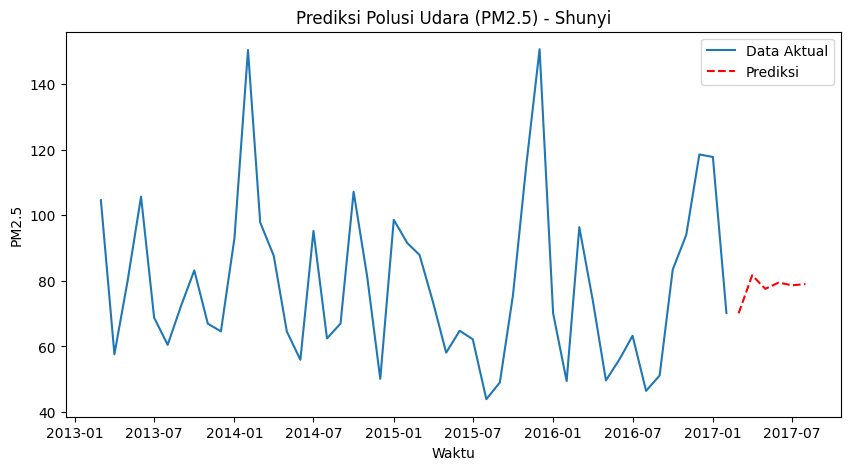

Processing Tiantan...


d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


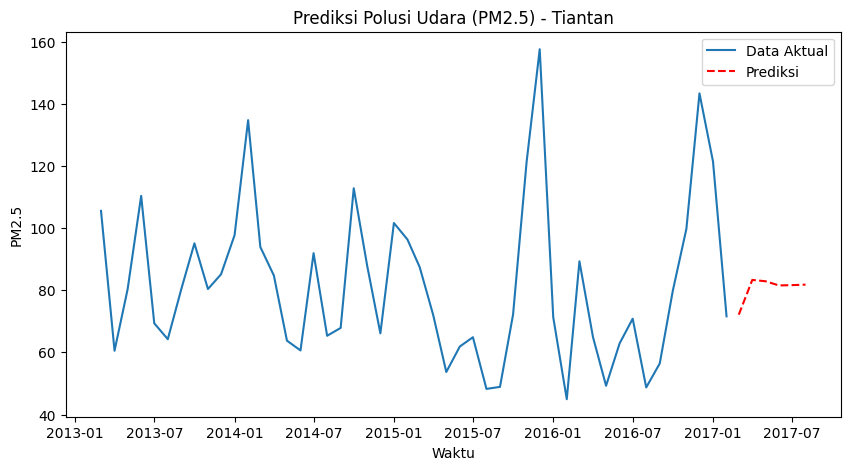

Processing Wanliu...


d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


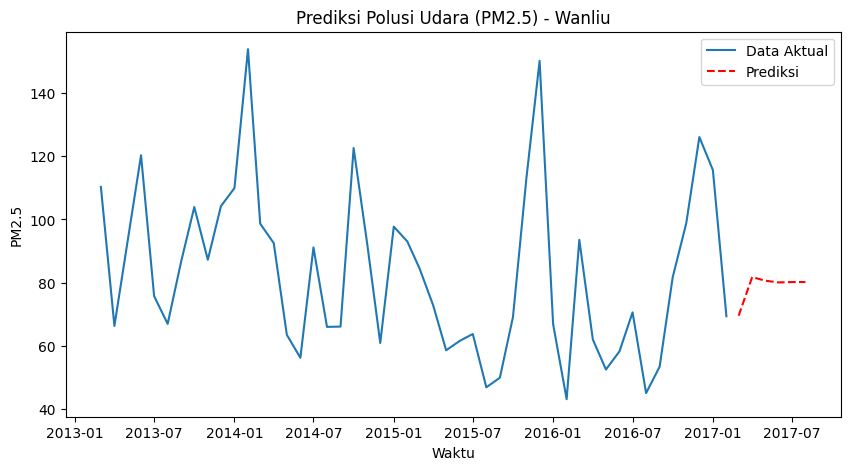

Processing Wanshouxigong...


d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\ipb capekk\MSIB\Laskar AI\Projek Dashboard\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


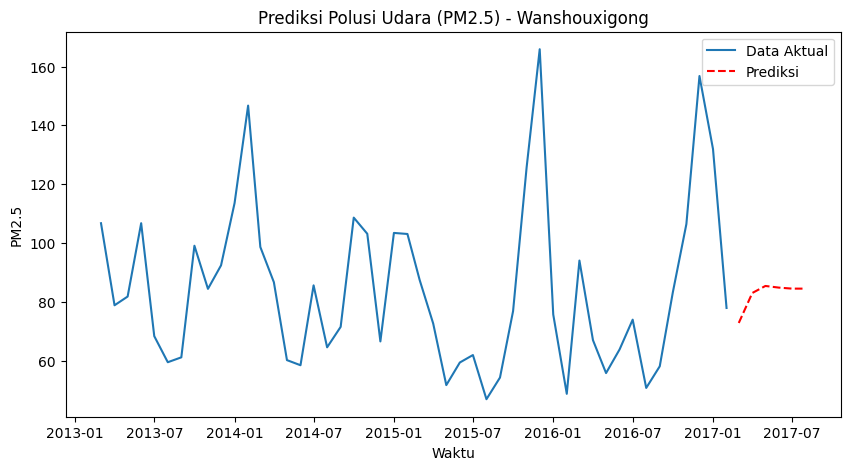

Hasil Prediksi:
             Aotizhongxin  Changping   Dingling     Dongsi   Guanyuan  \
2017-03-01     73.098919  67.246786  61.684787  76.859697  77.137751   
2017-04-01     84.707560  70.440226  67.961324  87.869152  84.749722   
2017-05-01     82.566029  70.354049  65.770835  85.866339  83.509051   
2017-06-01     81.858287  71.059219  65.716352  85.504169  82.233180   
2017-07-01     82.173446  70.671885  65.926874  85.696882  82.492279   
2017-08-01     82.185695  71.020598  65.882564  85.686656  82.704363   

              Gucheng    Huairou  Nongzhanguan     Shunyi    Tiantan  \
2017-03-01  68.338854  57.325240     74.847902  70.092709  72.122676   
2017-04-01  85.708762  73.403608     85.153316  81.653552  83.306367   
2017-05-01  84.481200  66.356346     85.311102  77.553473  82.889536   
2017-06-01  83.043549  70.915061     84.478584  79.447029  81.538507   
2017-07-01  83.284322  68.278211     84.462150  78.619744  81.632067   
2017-08-01  83.390606  69.848313     84.529389

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Buat dictionary untuk menyimpan hasil prediksi tiap stasiun
forecast_results = {}

# Loop untuk tiap stasiun
for station in merged_df["station"].unique():
    print(f"Processing {station}...")

    # Ambil data per stasiun
    station_data = merged_df[merged_df["station"] == station]
    station_data = station_data.groupby(["year", "month"])["PM2.5"].mean().dropna()

    # Konversi ke format time series
    station_data.index = pd.to_datetime(station_data.index.map(lambda x: f"{x[0]}-{x[1]}"))

    # Cek apakah data cukup untuk ARIMA
    if len(station_data) < 24:  # Minimum 2 tahun data
        print(f"Data untuk {station} terlalu sedikit, dilewati...\n")
        continue

    # Buat model ARIMA
    try:
        model = ARIMA(station_data, order=(2,1,2))
        model_fit = model.fit()

        # Prediksi 6 bulan ke depan
        forecast = model_fit.forecast(steps=6)

        # Simpan hasil prediksi ke dictionary
        forecast_results[station] = forecast

        # Plot hasil prediksi
        plt.figure(figsize=(10,5))
        plt.plot(station_data, label="Data Aktual")
        plt.plot(forecast, label="Prediksi", linestyle="dashed", color="red")
        plt.xlabel("Waktu")
        plt.ylabel("PM2.5")
        plt.title(f"Prediksi Polusi Udara (PM2.5) - {station}")
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error saat memproses {station}: {e}\n")

# Konversi hasil prediksi ke DataFrame
forecast_df = pd.DataFrame(forecast_results)
print("Hasil Prediksi:\n", forecast_df)


In [213]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Pilih variabel untuk clustering
features = merged_df.groupby("station")[["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]].mean().dropna()

# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Gunakan K-Means dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
features["Cluster"] = kmeans.fit_predict(features_scaled)

# Tampilkan hasil clustering
print(features.sort_values("Cluster"))


                   PM2.5        PM10        NO2        SO2           CO  \
station                                                                   
Aotizhongxin   82.040934  109.485803  58.830107  17.099223  1244.561887   
Dongsi         85.527068  109.889839  53.210913  18.313073  1290.857090   
Gucheng        83.320534  118.461442  55.625870  15.245193  1307.034309   
Guanyuan       82.442642  108.692679  57.621578  17.447772  1252.731776   
Nongzhanguan   84.304073  108.652398  57.799225  18.540560  1309.754991   
Wanshouxigong  84.428174  111.806274  55.260130  16.954974  1352.995351   
Wanliu         83.065591  110.234069  64.579548  18.189922  1297.682609   
Tiantan        81.640423  105.948856  52.947011  14.132702  1285.512720   
Dingling       65.745349   83.707175  28.127947  11.650766   904.615132   
Huairou        69.228839   91.272559  32.988181  11.978411  1017.584417   
Changping      70.744359   94.447773  44.159599  14.816361  1141.357061   
Shunyi         78.853887 

Explained variance ratio: [0.60791524 0.17210397]


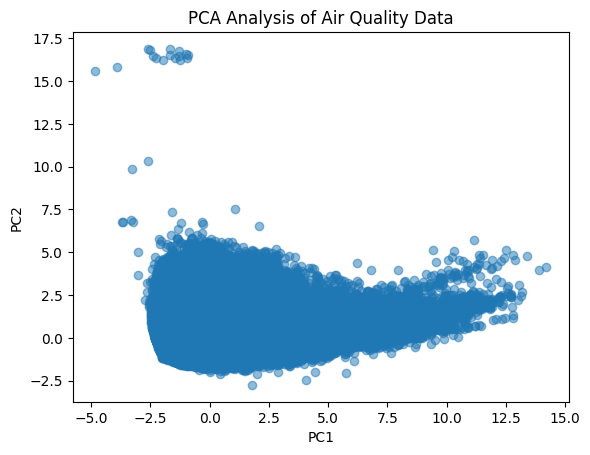

In [214]:
from sklearn.decomposition import PCA

# Normalisasi data sebelum PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(merged_df[["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]].dropna())

# Jalankan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Variansi yang dijelaskan oleh setiap komponen
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Scatter plot hasil PCA
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Analysis of Air Quality Data")
plt.show()

In [215]:
from sklearn.ensemble import IsolationForest

# Pilih fitur yang akan digunakan
features = merged_df[["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]].dropna()

# Model Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
merged_df["anomaly"] = iso_forest.fit_predict(features)

# Tampilkan anomali
print(merged_df[merged_df["anomaly"] == -1][["station", "year", "month", "PM2.5"]])

              station  year  month  PM2.5
56       Aotizhongxin  2013      3   77.0
57       Aotizhongxin  2013      3   83.0
58       Aotizhongxin  2013      3   94.0
101      Aotizhongxin  2013      3  117.0
102      Aotizhongxin  2013      3  104.0
...               ...   ...    ...    ...
420457  Wanshouxigong  2017      2  267.0
420458  Wanshouxigong  2017      2  273.0
420459  Wanshouxigong  2017      2  266.0
420460  Wanshouxigong  2017      2  264.0
420462  Wanshouxigong  2017      2  261.0

[21039 rows x 4 columns]


## Conclusion

A. Conclution pertanyaan 1
1. Pola Musiman
Grafik menunjukkan pola naik-turun yang teratur setiap tahunnya, mengindikasikan adanya pola musiman dalam kualitas udara.
Lonjakan PM2.5 sering terjadi pada bulan tertentu, kemungkinan pada musim dingin, di mana pemanasan rumah tangga dan kondisi atmosfer dapat memperburuk polusi udara.
Penurunan konsentrasi PM2.5 terjadi secara berkala, kemungkinan terkait dengan kondisi cuaca seperti curah hujan yang dapat membantu membersihkan udara.

2. Lonjakan Polusi
Terlihat adanya beberapa puncak ekstrem dengan konsentrasi PM2.5 yang sangat tinggi, yang terjadi secara serentak di berbagai stasiun.
Hal ini menunjukkan bahwa peningkatan polusi udara tidak hanya bersifat lokal, tetapi juga dipengaruhi oleh faktor yang lebih luas, seperti kebakaran hutan, aktivitas industri, atau perubahan atmosfer yang memerangkap polutan.

3. Perbedaan antar Stasiun
Meskipun semua stasiun menunjukkan pola tren yang serupa, terdapat perbedaan dalam tingkat konsentrasi PM2.5.
Beberapa stasiun seperti Wanshouxigong dan Tiantan cenderung memiliki konsentrasi lebih tinggi dibandingkan yang lain, menunjukkan bahwa daerah tersebut mungkin lebih rentan terhadap polusi udara.

4. Tren Jangka Panjang
Tidak terlihat adanya penurunan signifikan dalam kadar PM2.5 selama periode yang diamati, yang mengindikasikan bahwa kualitas udara masih menjadi isu yang perlu ditangani dalam jangka panjang.
Namun, jika dianalisis lebih lanjut, bisa dilihat apakah ada sedikit penurunan dalam beberapa tahun terakhir sebagai dampak dari kebijakan pengendalian polusi.

B. Conclution pertanyaan 2
1. Faktor dengan Korelasi Tinggi terhadap PM2.5:
- PM10 (0.88): PM10 memiliki korelasi sangat tinggi dengan PM2.5, yang berarti keduanya sering meningkat dan menurun bersamaan. Ini masuk akal karena PM10 mencakup partikel-partikel yang lebih besar, dan PM2.5 merupakan bagian dari PM10.
- CO (0.77): Karbon monoksida (CO) memiliki korelasi tinggi dengan PM2.5, menunjukkan bahwa polutan ini kemungkinan berasal dari sumber yang sama, seperti emisi kendaraan bermotor dan pembakaran bahan bakar fosil.
- NO2 (0.66): Nitrogen dioksida (NO2) juga memiliki korelasi cukup tinggi dengan PM2.5, yang menunjukkan kontribusi dari emisi kendaraan dan aktivitas industri.
- SO2 (0.48): Sulfur dioksida memiliki korelasi sedang dengan PM2.5, yang kemungkinan berasal dari pembakaran batu bara atau aktivitas industri lainnya.

2. Faktor dengan Korelasi Negatif terhadap PM2.5 (Faktor yang Membantu Membersihkan Udara):
- O3 (-0.15): Ozon memiliki korelasi negatif dengan PM2.5, yang dapat disebabkan oleh reaksi kimia atmosfer yang mengurangi partikel PM2.5 saat ozon meningkat.
- Temperatur (-0.13): Temperatur menunjukkan hubungan negatif kecil dengan PM2.5, yang berarti peningkatan suhu mungkin membantu mengurangi konsentrasi polutan, kemungkinan karena peningkatan kecepatan angin atau perubahan pola atmosfer.
- Tekanan Udara (-0.07): Korelasi lemah menunjukkan bahwa tekanan udara tidak terlalu memengaruhi konsentrasi PM2.5 secara langsung.
- Curah Hujan (-0.01): Meskipun hujan sering dianggap membantu mengurangi polusi udara dengan mencuci partikel dari atmosfer, dalam dataset ini efeknya tampaknya sangat kecil.

C. Conclution pertanyaan 3
Perbandingan Konsentrasi PM2.5 antar Stasiun:
- Grafik boxplot menunjukkan distribusi PM2.5 di berbagai stasiun pemantauan.
- Sebagian besar stasiun memiliki distribusi PM2.5 yang mirip, dengan median yang relatif seragam.
- Terdapat outlier yang menunjukkan adanya lonjakan konsentrasi PM2.5 yang cukup ekstrem di beberapa titik waktu.
- Rentang interkuartil (IQR) juga cukup mirip, yang menunjukkan bahwa variabilitas PM2.5 di semua stasiun hampir sama.